# Прогнозування обсягів продажу

In [17]:
from matplotlib import pyplot as plt
from storage import sales, list_groups
from tools import filter_outliers, offset_features_extractor, linreg_prediction

## Підготовка данних

Виводимо існуючі группи товарів

In [18]:
print(list_groups())

['grp0', 'grp1', 'grp2', 'grp3', 'grp4']


Задаємо группу товарів та фильтруемо джерело данных

In [19]:
product_group = 'grp2'
group_sales = sales[sales['group'] == product_group]
group_sales.head()

,sale_id,client_id,product_id,bill_id,discount,price,date,quantity,week,discount_prc,profit,group
13261,2,1,7,1,41,154,2020-01-02,4,1,0.210256,21.815385,grp2
13262,16,2,7,3,47,101,2020-01-02,3,1,0.317568,32.439189,grp2
13263,22,5,7,4,32,110,2020-01-02,3,1,0.225352,23.309859,grp2
13264,59,12,7,9,25,124,2020-01-02,4,1,0.167785,17.610738,grp2
13265,76,23,7,13,15,170,2020-01-02,3,1,0.081081,9.027027,grp2


## Фильтрація викидів

Групуємо продажі за тижнем

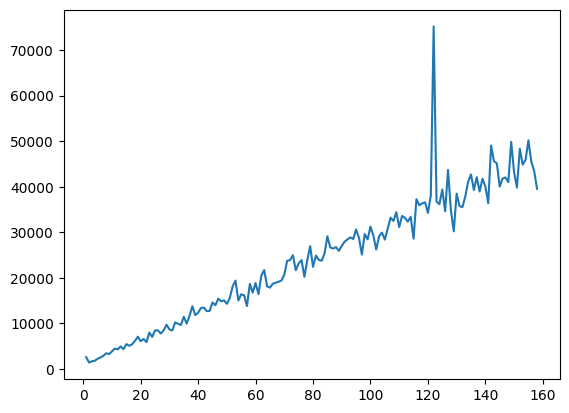

In [20]:
weekly = group_sales.groupby('week')['quantity'].sum()
plt.plot(weekly)
plt.show()

Фільтруемо викиди, за критерієм Z-Score відхилення від лінійний тренду

In [21]:
max_z_score = 3

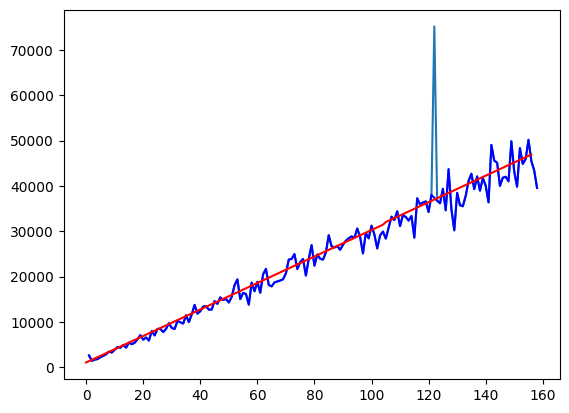

In [22]:
weekly_filtered, trend = filter_outliers(weekly, max_z_score)
plt.plot(weekly)
plt.plot(weekly_filtered, color='blue')
plt.plot(trend, color='red')
plt.show()

## Прогнозування продажів
Для прогнозування продажів використовуючи модель лінейної регресії. Функція фільтрації приймае часовий ряд, екстрактор фічей, та кілкість періодів. Застосовуемо offsets_features_extractor щоб врахувати глобальний та сезонний тренди.

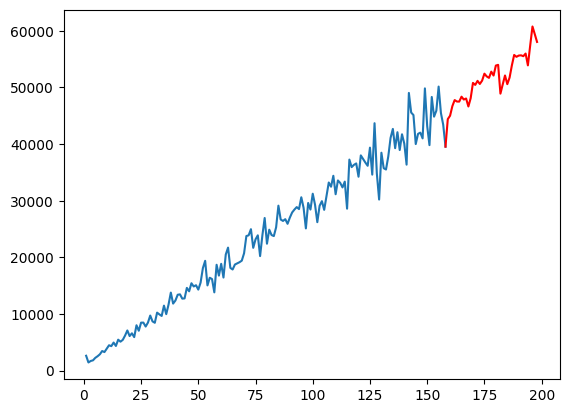

In [23]:
offset_extractor = offset_features_extractor([[-1, -2], [-52, -53]])
predicted_weekly = linreg_prediction(weekly_filtered, offset_extractor, 40)

plt.plot(weekly_filtered)
plt.plot(predicted_weekly, color='red')
plt.show()

Очикувнний обсяг продажу на наступні 4-и тиждня

In [24]:
predicted_weekly[:4].round().astype(int)

158    39548
159    44408
160    45013
161    46703
dtype: int64